## **STA6714 - Data Preparation**

### Import library

In [104]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [105]:
# Import Airbnb data
datapath_detailed = r'Dataset\listings_detailed.csv'
datapath_summary = r'Dataset\listings_summary.csv'


airbnb_detailed = pd.read_csv(datapath_detailed, low_memory=False)
airbnb_summary = pd.read_csv(datapath_summary, low_memory=False)

print(f'Airbnb detailed dataframe shape:', airbnb_detailed.shape)
print(f'Airbnb summary dataframe shape:', airbnb_summary.shape)

Airbnb detailed dataframe shape: (17167, 75)
Airbnb summary dataframe shape: (17167, 18)


The summary dataset is concise but lacks some important features required for building predictive models. To address this, we will merge the summary dataset with selected features from the detailed dataset to create a comprehensive dataset for analysis.

In [106]:
# Merge summary and some selected columns from detailed data by id

selected_cols = [
	'id',
	'host_response_time',
	'host_response_rate',
	'host_is_superhost',
	'accommodates',
	'bathrooms',
	'bedrooms'
]

airbnb_detailed_join = airbnb_detailed[selected_cols]

airbnb_df = pd.merge(airbnb_summary, airbnb_detailed_join, on='id', how='left')
print(f'Airbnb merged dataframe shape:', airbnb_df.shape)

Airbnb merged dataframe shape: (17167, 24)


## Explore Data Analyst

#### 1. Data Overview

In [107]:
# Check data info
print(f"Number of samples: {airbnb_df.shape[0]}")
print(f"Number of features: {airbnb_df.shape[1]}")
print(f"Features: {airbnb_df.columns.tolist()}")


Number of samples: 17167
Number of features: 24
Features: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'bedrooms']


In [108]:
airbnb_df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bathrooms,bedrooms
count,1.716700e+04,1.716700e+04,0.0,17167.000000,17167.000000,15983.000000,17167.000000,17167.000000,13940.000000,17167.000000,17167.000000,17167.000000,17167.000000,15971.000000,16930.000000
mean,6.521621e+17,2.332415e+08,NaN,26.106091,-80.141398,361.404054,5.590319,34.560028,1.439864,25.307683,230.006874,10.489194,5.064251,1.664360,1.900709
std,4.997975e+17,1.942118e+08,NaN,0.099491,0.051527,1059.830794,21.691480,64.566947,1.656405,62.158937,115.499547,16.184196,3.052362,0.991433,1.369138
min,5.781800e+04,5.146000e+03,NaN,25.957017,-80.420633,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.977412e+07,5.143385e+07,NaN,26.007981,-80.152374,129.000000,1.000000,1.000000,0.400000,1.000000,136.000000,0.000000,2.000000,1.000000,1.000000
50%,7.885763e+17,1.747805e+08,NaN,26.117990,-80.123370,207.000000,2.000000,11.000000,1.000000,5.000000,268.000000,4.000000,4.000000,1.000000,2.000000
75%,1.099933e+18,4.110870e+08,NaN,26.178745,-80.115539,385.000000,3.000000,41.000000,2.000000,18.000000,332.000000,15.000000,6.000000,2.000000,3.000000
max,1.319064e+18,6.680805e+08,NaN,26.334900,-80.075314,100000.000000,999.000000,1833.000000,50.500000,384.000000,365.000000,408.000000,16.000000,18.000000,15.000000


In [109]:
# Check data type and see the sample of the data
airbnb_df.info()
airbnb_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17167 entries, 0 to 17166
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17167 non-null  int64  
 1   name                            17167 non-null  object 
 2   host_id                         17167 non-null  int64  
 3   host_name                       17166 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   17167 non-null  object 
 6   latitude                        17167 non-null  float64
 7   longitude                       17167 non-null  float64
 8   room_type                       17167 non-null  object 
 9   price                           15983 non-null  float64
 10  minimum_nights                  17167 non-null  int64  
 11  number_of_reviews               17167 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,host_response_time,host_response_rate,host_is_superhost,accommodates,bathrooms,bedrooms
9703,871926651266988684,Studio Suite with Intracoastal Waterway Views,1833853,Ricardo,NaN,Hallandale Beach,25.9870,-80.12258,Entire home/apt,299.0,...,164,365,0,NaN,within an hour,100%,f,4,1.0,1.0
2038,33486918,"Condo with limitless view of water, sunsets & ...",31915983,Anne,NaN,Fort Lauderdale,26.1316,-80.10960,Entire home/apt,166.0,...,1,358,0,NaN,NaN,NaN,f,2,2.5,2.0
5877,549977378180451390,Beach Resort at Sea Gardens-Pompano Beach-1 Bd...,373307437,Deena,NaN,Pompano Beach,26.2410,-80.08807,Private room,NaN,...,18,176,0,NaN,within an hour,100%,t,4,NaN,1.0


#### 2. Checking Missing Value

In [110]:
# Function to check the missing values in the dataset
def missing_value_percentage(df):
    missing_df = pd.DataFrame(df.isnull().sum(), columns=['missing_values'])
    missing_df['percentage'] = (missing_df['missing_values'] / df.shape[0]) * 100
    missing_df = missing_df.sort_values(by='percentage', ascending=False).style.background_gradient(cmap='coolwarm')
    return missing_df

missing_value_percentage(airbnb_df)

,missing_values,percentage
neighbourhood_group,17167,100.000000
license,17161,99.965049
last_review,3227,18.797693
reviews_per_month,3227,18.797693
host_response_rate,1261,7.345488
host_response_time,1261,7.345488
bathrooms,1196,6.966855
price,1184,6.896953
host_is_superhost,592,3.448477
bedrooms,237,1.380556


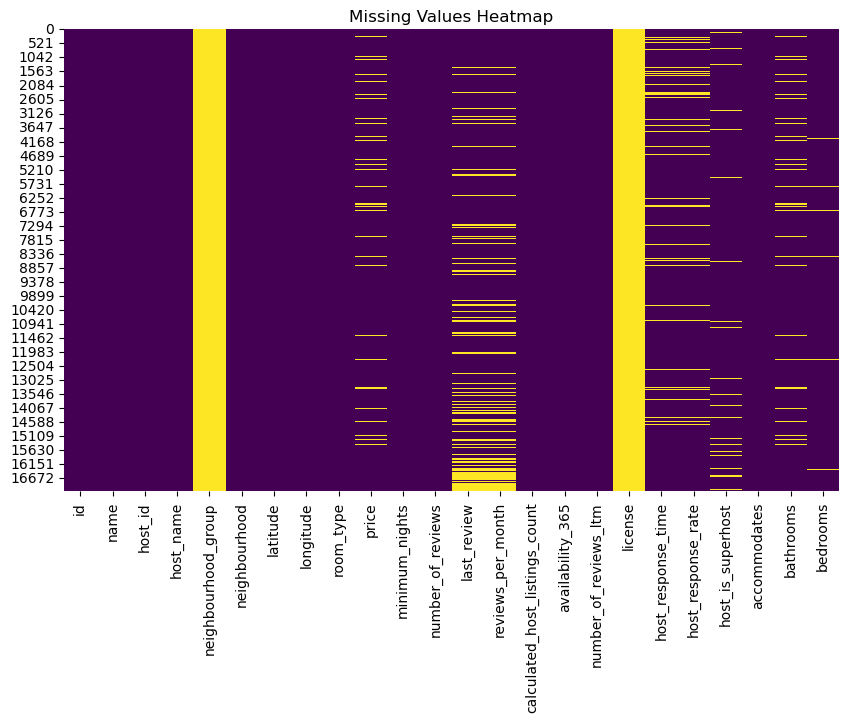

In [111]:
# Function to visualize the missing values in a heatmap
def missing_values_heatmap(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

# Display the missing values in a heatmap
missing_values_heatmap(airbnb_df)

**Features to Remove:**

- `neighbourhood_group` and `license` will be removed as they are completely missing and provide no useful information.
- `last_review`, `number_of_reviews`, `number_of_reviews_ltm`, `reviews_per_month`   will be removed as it does not hold significant meaning for the goal of this project.

**Features to Impute Later:**

- `host_response_rate`, `host_response_time`, `host_is_superhost` will be imputed later during the modeling process to avoid data leakage between the training and test sets.

**Target Variable: `price_per_bedroom`**

- `price` and `bedrooms` is the primary variable used to calculate the target variable as: 

$$
\text{price\_per\_bedroom} = \frac{\text{price}}{\text{bedrooms}}
$$

- Rows with missing `price` and `bedrooms` will be removed, since this value is essential and cannot be imputed without introducing artificial signals.

#### 3. Checking Outliers

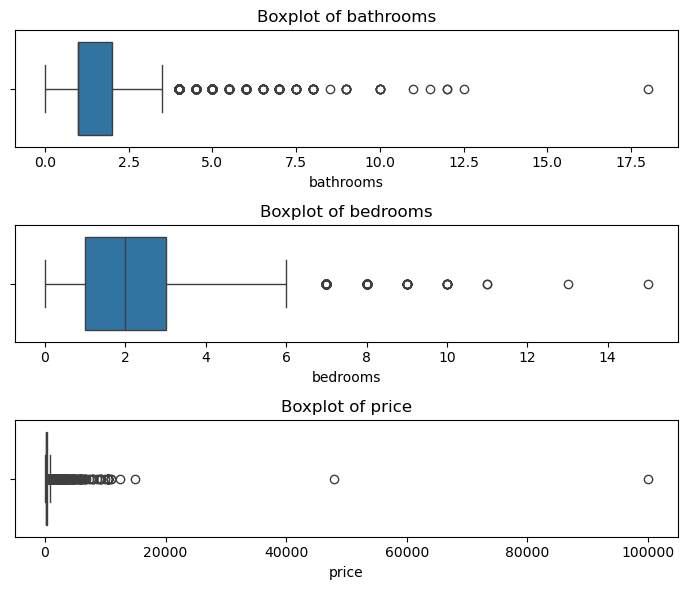

In [112]:
def boxplot_features(df, features):
    plt.figure(figsize=(7, 2 * len(features)))
    for i, feature in enumerate(features):
        plt.subplot(len(features), 1, i + 1)
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

# Boxplot for selected features
boxplot_features(airbnb_df, ['bathrooms', 'bedrooms', 'price'])

Boxplots of `bathrooms`, and `bedrooms` show a small number of high-value outliers. These values are realistic for large listings (e.g., villas, group rentals) and do not heavily distort the distributions.

Therefore, Outliers will be retained to preserve data variability and support generalization across diverse property types.

`price` very right skew and some price at very low price so we will cap the extreme value then log transform

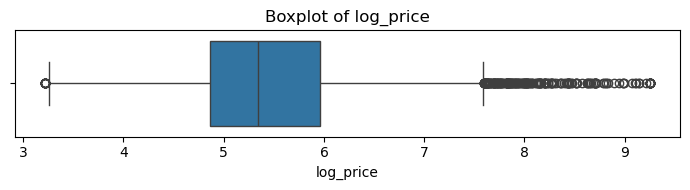

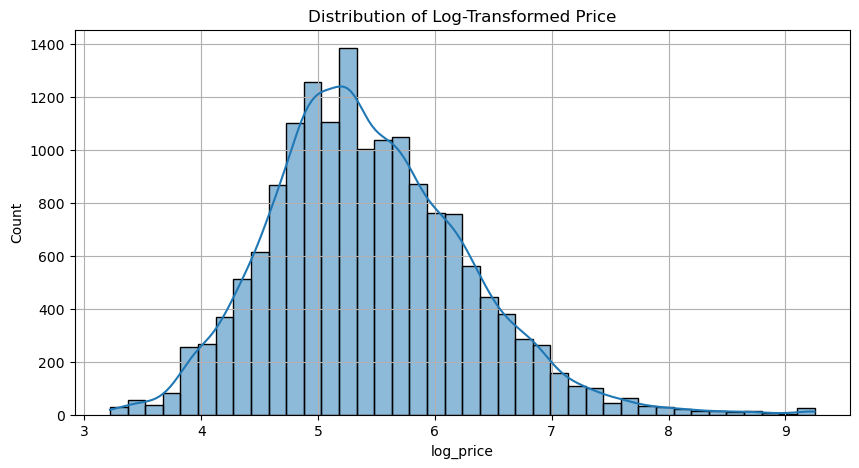

In [113]:
# Calculate the 0.001 and 0.999 quantiles for price
lower_cap = airbnb_df['price'].quantile(0.001)
upper_cap = airbnb_df['price'].quantile(0.999)

# Cap both ends
airbnb_df['price_capped'] = airbnb_df['price'].clip(lower=lower_cap, upper=upper_cap)

# Apply log transform
airbnb_df['log_price'] = np.log1p(airbnb_df['price_capped'])

# Boxplot for log-transformed price
boxplot_features(airbnb_df, ['log_price'])

# Histogram for log-transformed price
plt.figure(figsize=(10, 5))
sns.histplot(airbnb_df['log_price'], bins=40, kde=True)
plt.title("Distribution of Log-Transformed Price")
plt.xlabel("log_price")
plt.ylabel("Count")
plt.grid(True)
plt.show()

#### Explore pattern and test hypothesis

**Price distribution by room type**

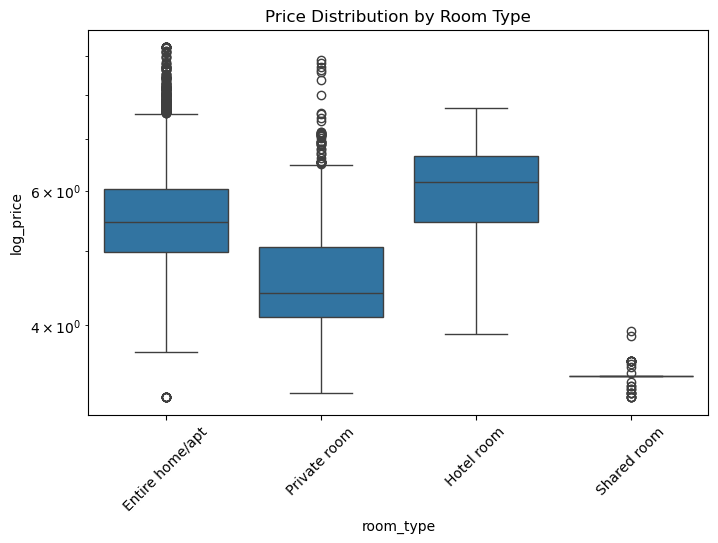

ANOVA F-statistic: 31.828
p-value: 0.000000000000000
✅ Reject H₀: There is a significant difference in average price between room types.


In [141]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=airbnb_df, x='room_type', y='log_price')
plt.title("Price Distribution by Room Type")
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

from scipy.stats import f_oneway

# Group prices by room_type
groups = [group['price'].dropna() for name, group in airbnb_df.groupby('room_type')]

# Run ANOVA test
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.15f}")

if p_val < 0.05:
    print("✅ Reject H₀: There is a significant difference in average price between room types.")
else:
    print("❌ Fail to reject H₀: No significant difference in average price between room types.")

**Price distribution by superhost**

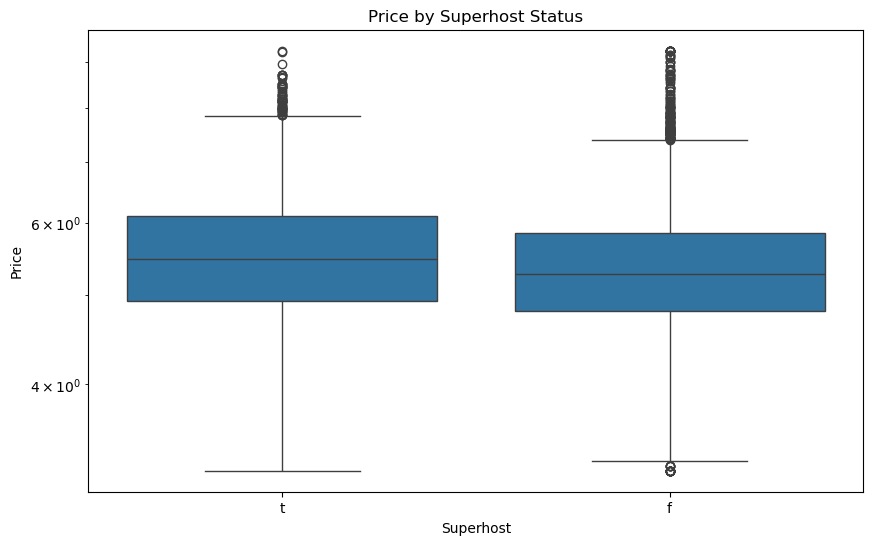

T-statistic: 2.074
p-value: 0.03807
✅ Reject H₀: Superhosts charge significantly different prices.


C:\Users\chumi\AppData\Local\Temp\ipykernel_15156\2705352554.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ttest['host_is_superhost'] = df_ttest['host_is_superhost'].map({'t': True, 'f': False})


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=airbnb_df, x='host_is_superhost', y='log_price')
plt.title("Price by Superhost Status")
plt.yscale('log')
plt.xlabel("Superhost")
plt.ylabel("Price")
plt.show()

from scipy.stats import ttest_ind

# Clean up: make sure no missing price or superhost status
df_ttest = airbnb_df.dropna(subset=['price', 'host_is_superhost'])

# Convert superhost to boolean if it's 't'/'f'
df_ttest['host_is_superhost'] = df_ttest['host_is_superhost'].map({'t': True, 'f': False})

# Separate groups
price_super = df_ttest[df_ttest['host_is_superhost'] == True]['price']
price_non_super = df_ttest[df_ttest['host_is_superhost'] == False]['price']

# Run T-test
t_stat, p_val = ttest_ind(price_super, price_non_super, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ Reject H₀: Superhosts charge significantly different prices.")
else:
    print("❌ Fail to reject H₀: No significant price difference between superhosts and non-superhosts.")

**Price distribution by response time**

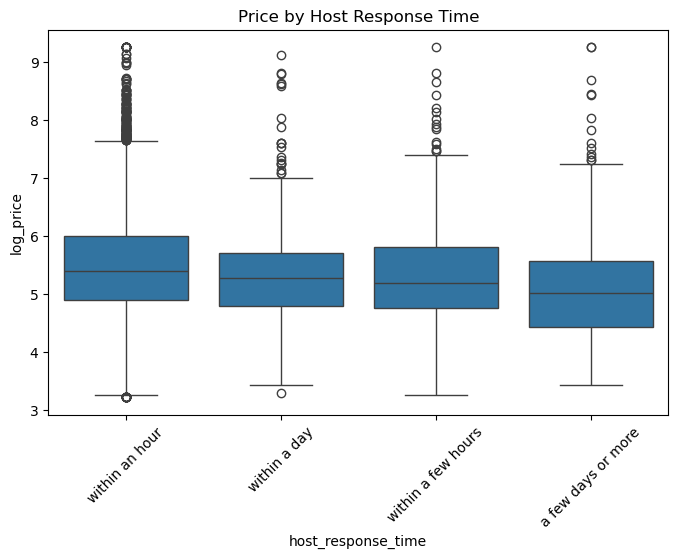

ANOVA F-statistic: 2.166
P-value: 0.08977
❌ Fail to reject H₀: No significant difference in price across response times.


In [116]:
# Drop missing values
df_resp = airbnb_df.dropna(subset=['host_response_time', 'price'])

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_resp, x='host_response_time', y='log_price')
plt.title("Price by Host Response Time")
plt.xticks(rotation=45)
plt.show()

# ANOVA test
groups = [group['price'].values for _, group in df_resp.groupby('host_response_time')]
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ Reject H₀: Host response time affects price.")
else:
    print("❌ Fail to reject H₀: No significant difference in price across response times.")

Room type distribution

<Axes: xlabel='room_type', ylabel='count'>

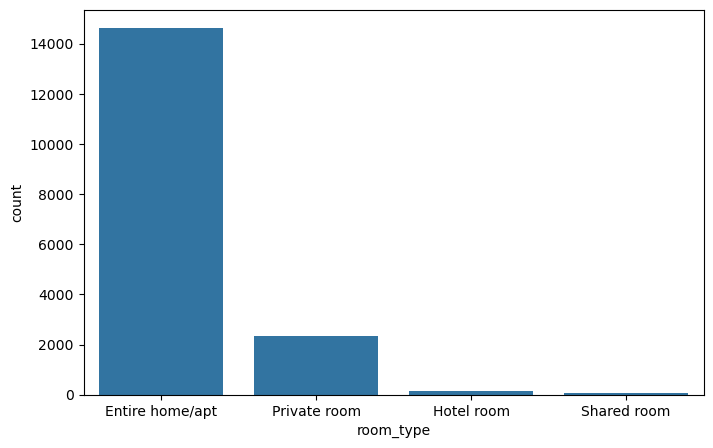

In [117]:
plt.figure(figsize=(8, 5))
sns.countplot(data=airbnb_df, x='room_type')

In [118]:
airbnb_df['room_type'].value_counts(normalize=True)

room_type
Entire home/apt    0.851576
Private room       0.135260
Hotel room         0.009204
Shared room        0.003961
Name: proportion, dtype: float64

Dataset is very unbalance since the nature of Airbnb dataset, we will split data and hold the portition by the `room_type` feature.

### Data Processing and Feature Engineering

Remove redundant features

In [119]:
# Drop irrelevant columns
cols_to_drop = [
    'id', 'host_id', 'name', 'host_name', 'license', 'last_review',
    'neighbourhood_group', 'neighbourhood', 'calculated_host_listings_count'
]
airbnb_df_1 = airbnb_df.drop(columns= cols_to_drop)

Encoder

In [120]:
# Convert categorical variables to numerical
airbnb_df_1['host_is_superhost'] = airbnb_df_1['host_is_superhost'].map({'t': 1, 'f': 0})

airbnb_df_1['host_response_rate'] = airbnb_df_1['host_response_rate'].str.replace('%', '').astype(float) / 100

airbnb_df_1['host_response_time'] = airbnb_df_1['host_response_time'].map({
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
})

Compute target variable

In [121]:
# Drop rows where price and bedrooms is missing or 0
airbnb_df_1 = airbnb_df_1.dropna(subset=['price'])
airbnb_df_1 = airbnb_df_1[(airbnb_df['price'] > 0)]

airbnb_df_1 = airbnb_df_1.dropna(subset=['bedrooms'])
airbnb_df_1 = airbnb_df_1[(airbnb_df['bedrooms'] > 0)]

airbnb_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14690 entries, 0 to 17166
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               14690 non-null  float64
 1   longitude              14690 non-null  float64
 2   room_type              14690 non-null  object 
 3   price                  14690 non-null  float64
 4   minimum_nights         14690 non-null  int64  
 5   number_of_reviews      14690 non-null  int64  
 6   reviews_per_month      12041 non-null  float64
 7   availability_365       14690 non-null  int64  
 8   number_of_reviews_ltm  14690 non-null  int64  
 9   host_response_time     13660 non-null  float64
 10  host_response_rate     13660 non-null  float64
 11  host_is_superhost      14189 non-null  float64
 12  accommodates           14690 non-null  int64  
 13  bathrooms              14679 non-null  float64
 14  bedrooms               14690 non-null  float64
 15  price_c

C:\Users\chumi\AppData\Local\Temp\ipykernel_15156\3504593163.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  airbnb_df_1 = airbnb_df_1[(airbnb_df['price'] > 0)]
C:\Users\chumi\AppData\Local\Temp\ipykernel_15156\3504593163.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  airbnb_df_1 = airbnb_df_1[(airbnb_df['bedrooms'] > 0)]


In [122]:
airbnb_df_1['price_per_bedroom'] = airbnb_df_1['log_price'] / airbnb_df_1['bedrooms']

In [123]:
airbnb_df_1.info()
missing_value_percentage(airbnb_df_1)

<class 'pandas.core.frame.DataFrame'>
Index: 14690 entries, 0 to 17166
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               14690 non-null  float64
 1   longitude              14690 non-null  float64
 2   room_type              14690 non-null  object 
 3   price                  14690 non-null  float64
 4   minimum_nights         14690 non-null  int64  
 5   number_of_reviews      14690 non-null  int64  
 6   reviews_per_month      12041 non-null  float64
 7   availability_365       14690 non-null  int64  
 8   number_of_reviews_ltm  14690 non-null  int64  
 9   host_response_time     13660 non-null  float64
 10  host_response_rate     13660 non-null  float64
 11  host_is_superhost      14189 non-null  float64
 12  accommodates           14690 non-null  int64  
 13  bathrooms              14679 non-null  float64
 14  bedrooms               14690 non-null  float64
 15  price_c

,missing_values,percentage
reviews_per_month,2649,18.032675
host_response_time,1030,7.011572
host_response_rate,1030,7.011572
host_is_superhost,501,3.410483
bathrooms,11,0.074881
log_price,0,0.000000
price_capped,0,0.000000
bedrooms,0,0.000000
accommodates,0,0.000000
latitude,0,0.000000


Multicolineary checking

Text(0.5, 1.0, 'Correlation Heatmap')

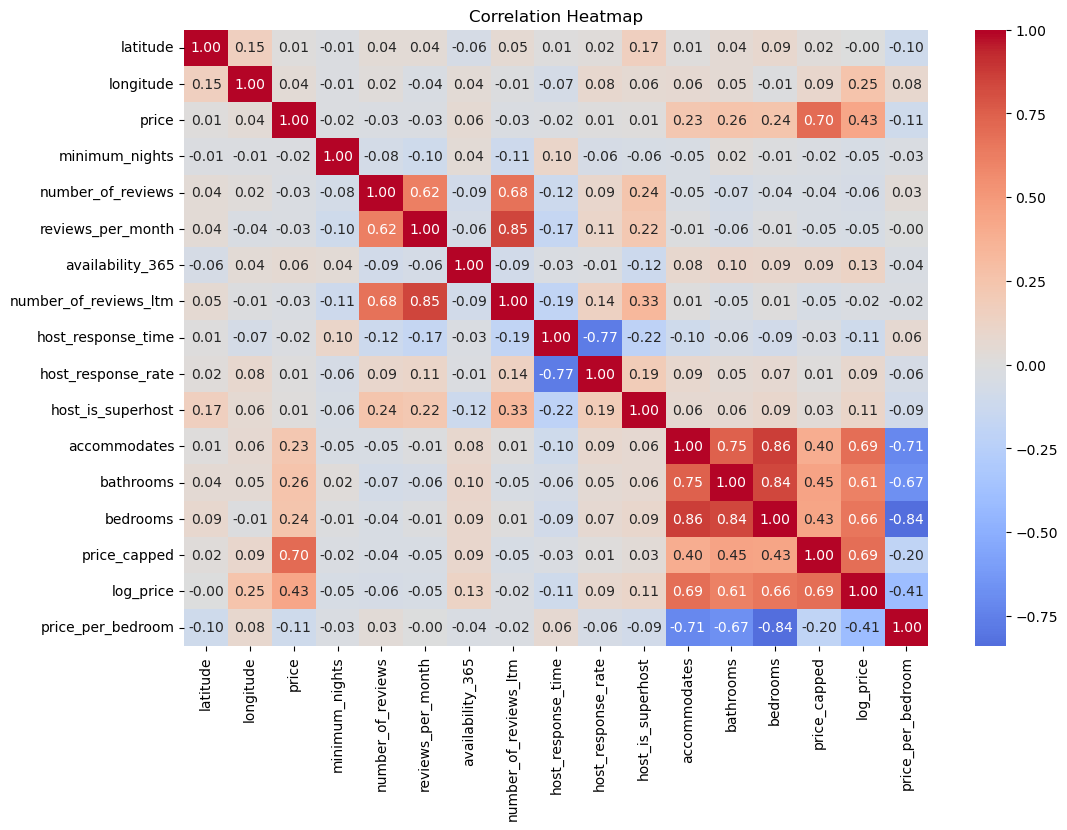

In [124]:
plt.figure(figsize=(12, 8))
sns.heatmap(airbnb_df_1.drop(columns=['room_type']).corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

In [125]:
# Check multicollinearity by VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numeric columns only
numeric_columns_only = airbnb_df_1.select_dtypes(include=['float64', 'int64', 'bool']).columns

# Handle missing or infinite values
X = airbnb_df_1[numeric_columns_only].replace([np.inf, -np.inf], np.nan).dropna()

# Add constant for VIF calculation
X = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.sort_values(by='VIF', ascending=False, inplace=True)
print(vif)

                  feature           VIF
0                   const  3.525435e+06
14               bedrooms  1.137589e+01
12           accommodates  4.930869e+00
16              log_price  4.450921e+00
17      price_per_bedroom  4.413310e+00
15           price_capped  4.305358e+00
8   number_of_reviews_ltm  4.032095e+00
13              bathrooms  3.904040e+00
6       reviews_per_month  3.625339e+00
9      host_response_time  2.133951e+00
10     host_response_rate  2.065673e+00
5       number_of_reviews  1.809956e+00
3                   price  1.674260e+00
2               longitude  1.257873e+00
11      host_is_superhost  1.202844e+00
1                latitude  1.142127e+00
7        availability_365  1.050678e+00
4          minimum_nights  1.030100e+00


In [126]:
unselected_features = [
    'price', 'price_capped', 'log_price', 'bedrooms',
    'number_of_reviews_ltm', 'reviews_per_month'
]

airbnb_df_processed = airbnb_df_1.drop(columns=unselected_features)
airbnb_df_processed.info()
missing_value_percentage(airbnb_df_processed)

<class 'pandas.core.frame.DataFrame'>
Index: 14690 entries, 0 to 17166
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            14690 non-null  float64
 1   longitude           14690 non-null  float64
 2   room_type           14690 non-null  object 
 3   minimum_nights      14690 non-null  int64  
 4   number_of_reviews   14690 non-null  int64  
 5   availability_365    14690 non-null  int64  
 6   host_response_time  13660 non-null  float64
 7   host_response_rate  13660 non-null  float64
 8   host_is_superhost   14189 non-null  float64
 9   accommodates        14690 non-null  int64  
 10  bathrooms           14679 non-null  float64
 11  price_per_bedroom   14690 non-null  float64
dtypes: float64(7), int64(4), object(1)
memory usage: 1.5+ MB


,missing_values,percentage
host_response_time,1030,7.011572
host_response_rate,1030,7.011572
host_is_superhost,501,3.410483
bathrooms,11,0.074881
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000
availability_365,0,0.000000


Impute missing value

Split data to train, test and validation set before impute missing data to avoid data leakage

In [127]:
from sklearn.model_selection import train_test_split

# Split the data into train, test set
train_df, test_df = train_test_split(airbnb_df_processed, test_size=0.2, random_state=42, stratify=airbnb_df_processed['room_type'])

print(f'Train set shape: {train_df.shape}')
print(f'Test set shape: {test_df.shape}')

Train set shape: (11752, 12)
Test set shape: (2938, 12)


In [128]:
# Impute host_response_time with mode by room_type
def impute_host_response_time(df):
    mode_response_time = df.groupby('room_type')['host_response_time'].transform(lambda x: x.mode()[0])
    df['host_response_time'] = df['host_response_time'].fillna(mode_response_time)
    return df

train_df = impute_host_response_time(train_df)
test_df = impute_host_response_time(test_df)


# Impute host_response_rate with mean by room_type
def impute_host_response_rate(df):
    mean_response_rate = df.groupby('room_type')['host_response_rate'].transform('mean')
    df['host_response_rate'] = df['host_response_rate'].fillna(mean_response_rate)
    return df

train_df = impute_host_response_rate(train_df)
test_df = impute_host_response_rate(test_df)


# Impute host_is_superhost with 0 for missing values
train_df['host_is_superhost'] = train_df['host_is_superhost'].fillna(0)
test_df['host_is_superhost'] = test_df['host_is_superhost'].fillna(0)

# Impute bathrooms with mean by room_type
def impute_bathrooms(df):
    mean_bathrooms = df.groupby('room_type')['bathrooms'].transform('mean')
    df['bathrooms'] = df['bathrooms'].fillna(mean_bathrooms)
    return df

train_df = impute_bathrooms(train_df)
test_df = impute_bathrooms(test_df)

In [129]:
# Check for missing values after imputation
print("Missing values in test set after imputation:")
missing_value_percentage(test_df)

Missing values in test set after imputation:


,missing_values,percentage
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000
availability_365,0,0.000000
host_response_time,0,0.000000
host_response_rate,0,0.000000
host_is_superhost,0,0.000000
accommodates,0,0.000000


In [130]:
# Check for missing values after imputation
print("Missing values in train set after imputation:")
missing_value_percentage(train_df)

Missing values in train set after imputation:


,missing_values,percentage
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000
availability_365,0,0.000000
host_response_time,0,0.000000
host_response_rate,0,0.000000
host_is_superhost,0,0.000000
accommodates,0,0.000000


In [131]:
# Function to encode room_type using one-hot encoding
def encode_room_type(df):
    room_type_dummies = pd.get_dummies(df['room_type'], prefix='room_type')
    df = pd.concat([df, room_type_dummies], axis=1)
    df.drop(columns=['room_type'], inplace=True)
    return df

# Encode room_type for train and test set
train_df = encode_room_type(train_df)
test_df = encode_room_type(test_df)
# Check the train and test set
print(f'Train set shape after encoding: {train_df.shape}')
print(f'Test set shape after encoding: {test_df.shape}')

Train set shape after encoding: (11752, 15)
Test set shape after encoding: (2938, 15)


#### Build Model

In [133]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 1. Prepare data (use same scaled/encoded version if needed)
X_train = train_df.drop(columns=['price_per_bedroom'])
y_train = train_df['price_per_bedroom']

X_test = test_df.drop(columns=['price_per_bedroom'])
y_test = test_df['price_per_bedroom']

from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

# Define grid manually
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = list(ParameterGrid(param_grid))
results = []

print(f"Running {len(grid)} combinations...")

for params in tqdm(grid, desc="Training XGBoost models"):
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,
        **params
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append((params, rmse))

# Get best result
best_params, best_rmse = sorted(results, key=lambda x: x[1])[0]

print("✅ Best Parameters:", best_params)
print(f"✅ Best RMSE: {best_rmse:.4f}")


Running 72 combinations...


Training XGBoost models: 100%|██████████| 72/72 [00:26<00:00,  2.71it/s]

✅ Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
✅ Best RMSE: 0.6063


 98%|===================| 2889/2938 [00:35<00:00]        

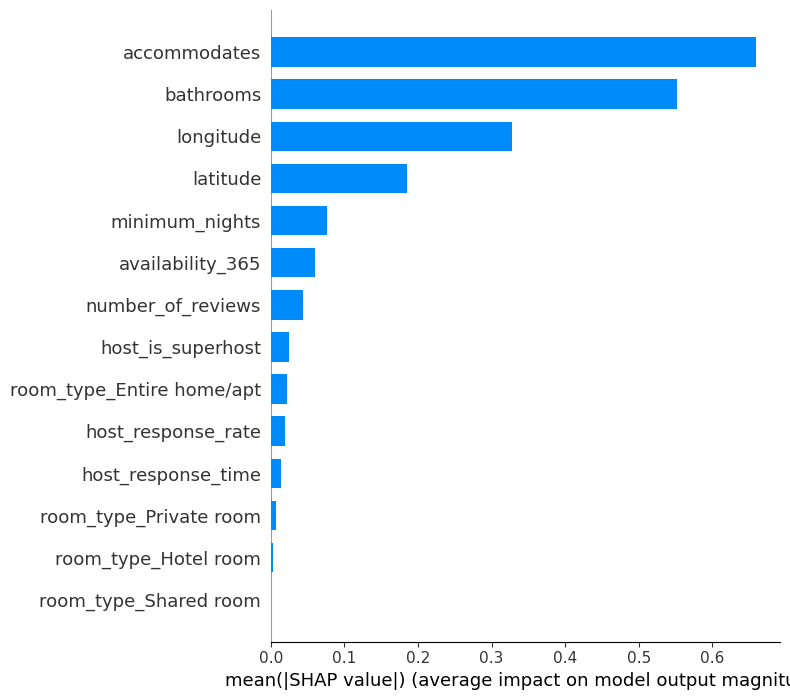

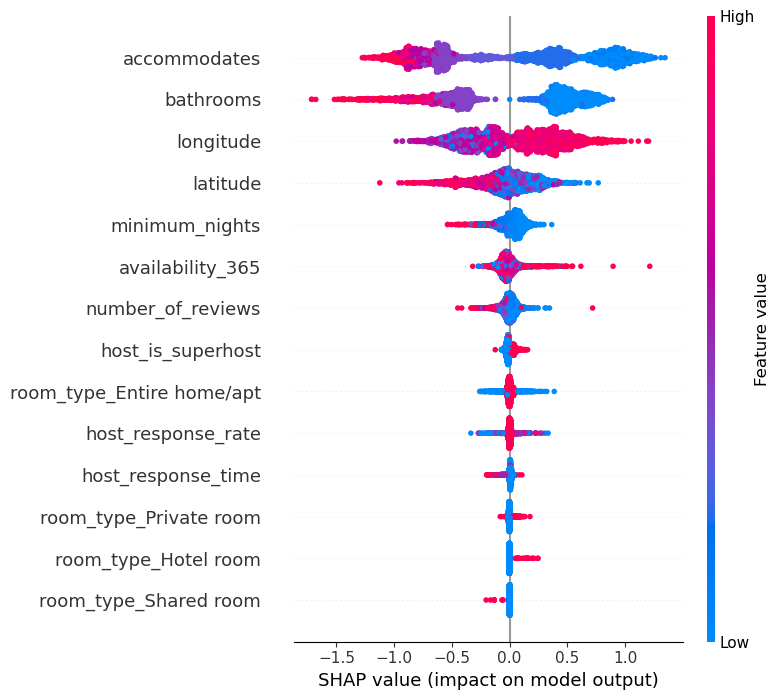

In [136]:
import shap

# Ensure all columns in X_train and X_test are numeric
X_train = X_train.copy()
X_test = X_test.copy()

# Convert boolean columns to integers
for col in X_train.select_dtypes(include=['bool']).columns:
	X_train[col] = X_train[col].astype(int)
	X_test[col] = X_test[col].astype(int)

# Create a SHAP explainer
explainer = shap.Explainer(best_model, X_train)

# Calculate SHAP values for test set
shap_values = explainer(X_test)

# Summary plot: shows both importance and direction of impact
shap.summary_plot(shap_values, X_test, plot_type="bar")  # for importance only
shap.summary_plot(shap_values, X_test)  # shows direction (red = positive impact)
